## Neural Network Classification with Pytorch

### Making Classification data

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

#Make 20000 samples
n_samples = 500

# create circles
X,y = make_circles(n_samples = n_samples, 
                   shuffle= True, 
                   noise= 0.02, 
                   random_state= 3)

In [4]:
len(X), len(y)

(500, 500)

In [5]:
print(X[:5]), print(y[:5])

[[-1.0188109  -0.11892511]
 [ 0.40873583  0.70162994]
 [ 0.57310863  0.81153316]
 [ 0.9385223  -0.29901752]
 [ 0.08208503 -0.99740384]]
[0 1 0 0 0]


(None, None)

In [6]:
# Make dataframe with pandas
import pandas as pd
circles_df = pd.DataFrame({"X1": X[:, 0],
                           "X2": X[:, 1],
                           "label": y})

In [7]:
circles_df.head(10)

,X1,X2,label
0,-1.018811,-0.118925,0
1,0.408736,0.701630,1
2,0.573109,0.811533,0
3,0.938522,-0.299018,0
4,0.082085,-0.997404,0
5,-0.360639,-0.714136,1
6,-0.176186,0.800370,1
7,0.756878,0.648221,0
8,0.576913,-0.846904,0
9,0.714830,-0.319967,1


### Data Visualization

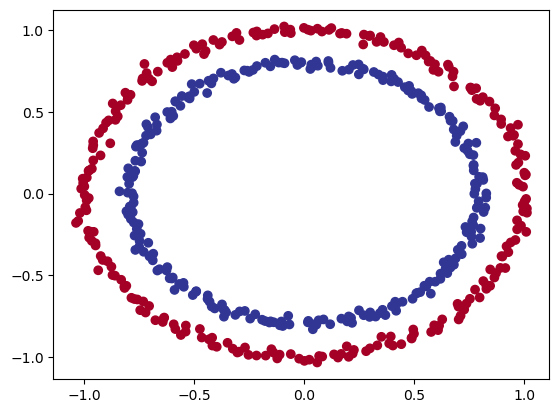

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
           y = X[:, 1],
           c = y,
           cmap = plt.cm.RdYlBu)

In [9]:
# Check input and output shapes
X.shape, y.shape

((500, 2), (500,))

### Turning Data into Tebsors and create train and test splits

In [10]:
import torch

In [11]:
X = torch.from_numpy(X).type(torch.float32)

In [12]:
y = torch.from_numpy(y).type(torch.float32)

In [13]:
X[:5], y[:5]

(tensor([[-1.0188, -0.1189],
         [ 0.4087,  0.7016],
         [ 0.5731,  0.8115],
         [ 0.9385, -0.2990],
         [ 0.0821, -0.9974]]),
 tensor([0., 1., 0., 0., 0.]))

In [14]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [15]:
## Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y, 
                                                 test_size= 0.3, 
                                                 random_state = 95)

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(350, 350, 150, 150)

## 2.Build a Model

1. Setup device agnostic code so our code will run on acceleration if available
2. Construct a model (subclassing `nn.Module`)
3. Define a loss Function and Optimizer
4. Create a Training and Testing Loop

In [17]:
# 1. setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train.shape

torch.Size([350, 2])

In [19]:
import torch
from torch import nn

In [20]:
# Create a model that subclasses nn.Module

class CircleModel1(nn.Module):
    def __init__(self):
        super().__init__()

        # create nn.Linear Layers 
        self.layer1 = nn.Linear(in_features = 2,
                               out_features = 8)
        self.layer2 = nn.Linear(in_features = 8,
                               out_features = 8)
        self.layer3 = nn.Linear(in_features = 8,
                               out_features = 1)

        # define a forward() method that outlines the forward pass
    def forward(self,x):
        return self.layer2(self.layer1(x))

In [21]:
model_0 = CircleModel1().to(device)
model_0

CircleModel1(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
)

In [22]:
model_0.parameters()

<generator object Module.parameters at 0x163bdfae0>

In [23]:
# Lets replicate the above model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)



In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3025,  0.1512],
                      [ 0.5467, -0.3433],
                      [-0.5850, -0.2552],
                      [ 0.0109, -0.0685],
                      [ 0.4651, -0.0011],
                      [ 0.5810,  0.1070],
                      [-0.5003, -0.3184],
                      [ 0.5129, -0.0873],
                      [-0.1863, -0.6541],
                      [ 0.1338,  0.1897]])),
             ('0.bias',
              tensor([ 0.3505,  0.1971, -0.1024, -0.2429,  0.2594,  0.2950,  0.5368,  0.5089,
                      -0.6063, -0.0885])),
             ('1.weight',
              tensor([[ 0.1147, -0.0536, -0.0712, -0.0814,  0.2788, -0.0774,  0.2350, -0.2177,
                       -0.2299,  0.1456]])),
             ('1.bias', tensor([-0.0091]))])

In [25]:
# Make predictions

In [26]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of Test Samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of Predictions: 150, Shape: torch.Size([150, 1])
Length of Test Samples: 150, Shape: torch.Size([150, 2])

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels: 
tensor([0., 1., 0., 1., 1., 1., 0., 1., 1., 0.])


### 2.1 Setup Loss Function and Optimizer

Loss Functions - 
1. For regression we can use MAE or MSE - Mean Absoulte Error or Mean Squared Error
2. For Classification we can use Binary Cross Entropy or Categorical Cross Entropy

Optimizers
1. For Optimizers the two most common optimizers are SGD and Adam Optimizers


For Loss Function we will use - torch.nn.BCEWithLogitsLoss()

In [27]:
## Setup the Loss Function
# loss_fn = nn.BCELoss()-> requiress inputs to have first gone through sigmoid activation functuon before going to nn.BCELoss()
# nn.BCEWithLogitsLoss ->
# nn.Sequential(
# nn.sigmoid()
# nn.BCELoss()
#)
# this is a sigmoid activation function where 

In [28]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.1)

In [29]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[ 0.3025,  0.1512],
                      [ 0.5467, -0.3433],
                      [-0.5850, -0.2552],
                      [ 0.0109, -0.0685],
                      [ 0.4651, -0.0011],
                      [ 0.5810,  0.1070],
                      [-0.5003, -0.3184],
                      [ 0.5129, -0.0873],
                      [-0.1863, -0.6541],
                      [ 0.1338,  0.1897]])),
             ('0.bias',
              tensor([ 0.3505,  0.1971, -0.1024, -0.2429,  0.2594,  0.2950,  0.5368,  0.5089,
                      -0.6063, -0.0885])),
             ('1.weight',
              tensor([[ 0.1147, -0.0536, -0.0712, -0.0814,  0.2788, -0.0774,  0.2350, -0.2177,
                       -0.2299,  0.1456]])),
             ('1.bias', tensor([-0.0091]))])

\(Accuracy={Numberofcorrectpredictions}/{Totalnumberofpredictions})

In [30]:
# Calculate an Evaluation Metric
def accuracy_fn(y_true,y_pred):
    correct_preds = torch.eq(y_true, y_pred).sum().item() #we are gonna do .item() as we need the sum as a single value in python
    accuracy = correct_preds / len(y_pred)
    return accuracy * 100

## 3. Train Model

#### to train our model we need to build pytorch training loop:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward (backward propogation)
5. Optimizer step step step

### 3.1 Going from raw logits -> Prediction Probabilities -> Prediction Labels

1. Our model outputs are going to be raw **logits**
2. We can convert the raw **logits** into prediction probabilities by passing them into an activation function (eg: sigmoid for binary classification or softmax for multi class classification)
3. Then we can convert our models's prediction probabilities to **prediction labels** by either rounding them or by taking the `argmx function` 

In [31]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
# view the first 5 outputs of the forward pass on the test data
# during testing phase, put the model in eval mode
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits
# The below are called logits which are raw output of the model, without being passed into any activation function

tensor([[0.2825],
        [0.0941],
        [0.3480],
        [0.1815],
        [0.3628]])

In [33]:
y_test[:5]

tensor([0., 1., 0., 1., 1.])

In [34]:
# Use the sigmoid activation function on the raw logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5702],
        [0.5235],
        [0.5861],
        [0.5452],
        [0.5897]])

In [35]:
# if y_pred_probs >= 0.5, y = 1
# if y_pred_probs < 0.5, y = 0
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [36]:
y_preds.squeeze()

tensor([1., 1., 1., 1., 1.])

### 3.2 Building a Training Loop

torch.manual_seed(95)

epochs = 2

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training loop and Eval loop

for epoch in range(epochs):
    
    ## Training model_0
    model_0.train()

    ## 1. Do the forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) # turn logits into pred probs and then into prediction labels 

    ## 2. Calculate the loss and accuracy
    loss = loss_fn(y_preds, y_train)
    accuracy = accuracy_fn(y_true = y_train,
                          y_pred = y_preds)

    ## 3. Optimizer zero grad
    optimizer.zero_grad()

    ## 4. loss backward
    loss.backward()

    ## 5. Oprimizer Step
    optimizer.step()

    ## Testing
    model_0.eval()
    with torch.inference_mode():
        
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        ## 2. Calculate the test loss and test accuracy
        test_loss = loss_fn(y_preds, y_test)
        test_accuracy = accuracy_fn(y_true = y_test,
                                   y_pred = y_preds)
    print(f"Epoch:  {epoch},  Train Loss : {loss},  Train Accuracy : {accuracy}")
    print(f"Epoch : {epoch},  Test Loss : {test_loss},  Test Accuracy : {test_accuracy}")

### 4.Importing helper functions

In [37]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [38]:
import requests
from pathlib import Path

# Download Helper functions from Laearn Pytorch repo or from anywhere on the internet
if Path("helper_functions.py").is_file():
    print("File exists skipping download.")
else:
    print("Downloading Helper Functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

File exists skipping download.


In [39]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
        self.layer_2 = nn.Linear(in_features = 16, out_features = 8)
        self.layer_3 = nn.Linear(in_features = 8, out_features = 1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)

In [40]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
)

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2549,  0.4712],
                      [ 0.5460, -0.4147],
                      [-0.1259,  0.1816],
                      [-0.2424,  0.2698],
                      [-0.5458,  0.0096],
                      [ 0.5430, -0.3264],
                      [ 0.4008, -0.4827],
                      [ 0.4036,  0.5985],
                      [-0.1952,  0.5281],
                      [ 0.6759, -0.2499],
                      [ 0.6295,  0.0523],
                      [-0.0385,  0.3652],
                      [ 0.5814, -0.6464],
                      [ 0.3492, -0.0582],
                      [ 0.2564,  0.6067],
                      [ 0.2089, -0.6978]])),
             ('layer_1.bias',
              tensor([-0.4941, -0.0479,  0.5544, -0.6176,  0.4499, -0.5955,  0.1559,  0.0205,
                      -0.6765, -0.3002, -0.3027,  0.4747,  0.2562,  0.1904, -0.1554, -0.4593])),
             ('layer_2.weight',
              tensor([[-0.0507,  0.2287,

In [42]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

### Non-Linearity

In [43]:
## using New Non-Linear dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

#Make 20000 samples
n_samples = 500

# create circles
X,y = make_circles(n_samples = n_samples, 
                   shuffle= True, 
                   noise= 0.02, 
                   random_state= 3)

In [44]:
y.shape, X.shape

((500,), (500, 2))

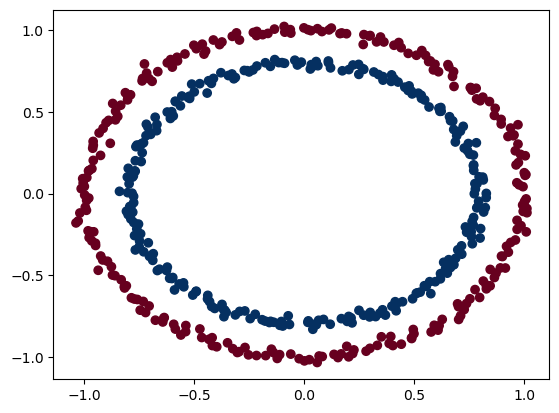

In [45]:
plt.scatter(X[:, 0],X[:,1], c = y, cmap = plt.cm.RdBu)

In [46]:
X[:10]

array([[-1.0188109 , -0.11892511],
       [ 0.40873583,  0.70162994],
       [ 0.57310863,  0.81153316],
       [ 0.9385223 , -0.29901752],
       [ 0.08208503, -0.99740384],
       [-0.36063927, -0.71413624],
       [-0.17618606,  0.80036954],
       [ 0.75687838,  0.64822092],
       [ 0.5769128 , -0.84690358],
       [ 0.71482996, -0.31996736]])

In [47]:
y[:10]

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [48]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [49]:
import torch

In [50]:
# converting data from ndarray into tensors data type
X = torch.from_numpy(X).type(torch.float)

In [51]:
y = torch.from_numpy(y).type(torch.float)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 95,
                                                test_size = 0.3)

len(X_train), len(y_train), len(X_test), len(y_test)

(350, 350, 150, 150)

In [54]:
type(X_train),type(y_train), type(X_test), type(y_test)

(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

In [55]:
X_train[:10], y_train[:10]

(tensor([[-0.5209,  0.5957],
         [ 0.9714,  0.3025],
         [-0.9586,  0.3190],
         [ 0.2683,  0.9123],
         [-0.9646, -0.2896],
         [-0.5851, -0.8293],
         [ 0.9712,  0.4212],
         [ 1.0119, -0.0914],
         [ 0.5270, -0.6031],
         [ 0.4989, -0.8576]]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

## Building the model with Non-Linearity

In [56]:
import torch
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
        self.layer_2 = nn.Linear(in_features = 16, out_features = 8)
        self.layer_3 = nn.Linear(in_features = 8, out_features = 1)
        self.relu = nn.ReLU

    def forward(self, x):
        return self.layer_3(self.relu()(self.layer_2(self.relu()(self.layer_1(x)))))

In [57]:
model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
)

In [58]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 1.5568e-01, -2.0375e-01],
                      [-3.2499e-01,  2.7919e-01],
                      [-4.5940e-01, -4.7168e-01],
                      [ 6.1999e-01,  2.6371e-01],
                      [ 2.5350e-01, -6.3247e-01],
                      [-6.6787e-01,  6.5390e-01],
                      [ 4.2314e-02, -6.5827e-01],
                      [ 2.5793e-01,  6.8073e-02],
                      [-5.8310e-01, -2.4878e-01],
                      [-6.5365e-01,  9.6670e-02],
                      [ 4.4329e-01,  5.0817e-02],
                      [-4.9298e-01, -2.8115e-01],
                      [-2.8368e-01,  9.3547e-02],
                      [-1.3117e-01, -7.0374e-01],
                      [-5.5248e-04, -6.3846e-01],
                      [ 6.9654e-02, -2.2543e-01]])),
             ('layer_1.bias',
              tensor([ 0.1299, -0.3458,  0.6198,  0.4571,  0.6600, -0.2891,  0.6992,  0.5674,
                       0.5882,  0.3760, -

In [59]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model_3.parameters(), lr = 0.01)

In [60]:
def accuracy_fn(y_true,y_pred):
    correct_preds = torch.eq(y_true, y_pred).sum().item() #we are gonna do .item() as we need the sum as a single value in python
    accuracy = correct_preds / len(y_pred)
    return accuracy * 100

NameError: name 'plot_decisison_boundary' is not defined

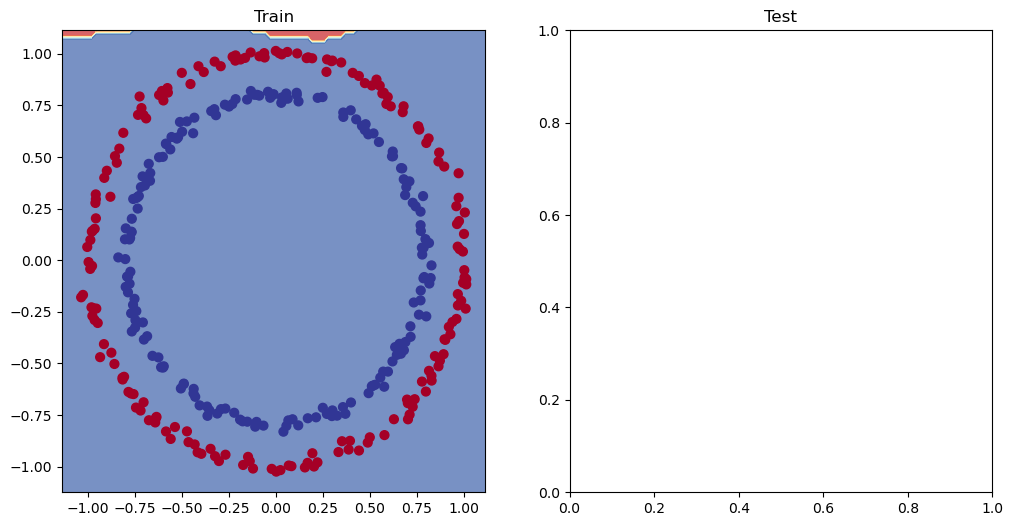

In [61]:
## Plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decisison_boundary(model_3, X_test, y_test)

### Creating a Toy Multiclass Model

In [ ]:
## Import Depandencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
# Setting the Hyperparamters
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 95

In [ ]:
# Creating multiclass data
x_blob, y_blob = make_blobs(n_samples = 500,
                           n_features= NUM_FEATURES,
                           centers = NUM_CLASSES,
                           cluster_std = 1.4,
                           random_state = RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


# plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [ ]:
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob, y_blob, test_size=0.3, random_state = 95)

In [ ]:
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
## Build a Multiclass Classification Model

class BlobMultiClass_Classification(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        """
            Initializes Multiclass Classification Model

            Args: 
            Input Featues(int) : Number of input features in the model
            Output Features(int) : Number of output features in the model
            hidden_units(int) : Number of hidden units between layers
        """
        super(). __init__()        
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

In [ ]:
X_blob_train.shape, y_blob_train.shape

In [ ]:
y_blob_train.unique()

In [ ]:
# Create an Instance of the BlobModel and send it to target device
blob_model = BlobMultiClass_Classification(input_features= 2,
                                          output_features= 5,
                                          hidden_units=8)

In [ ]:
blob_model.state_dict()

In [ ]:
blob_model.parameters

#### Create a Loss Function and an Optimizer for a Multi-class classification Model

In [ ]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(params = blob_model.parameters(),
                            lr = 0.01)

In [ ]:
blob_model(X_blob_train)

In [ ]:
blob_model(X_blob_test)

## Getting Predictions from the model
##### Logits (raw output of the model) --> pred probs (use `torch.softmax`) -->  pred labels (take the argmax of the prediction probs)

In [ ]:
blob_model.eval()
with torch.inference_mode():
    pred_logits = blob_model(X_blob_test.to(device))

In [ ]:
pred_logits.shape

In [ ]:
pred_probs = torch.sigmoid(pred_logits)

In [ ]:
pred_probs[:10]

In [ ]:
y_blob_test[:10]

In [ ]:
torch.sum(pred_probs[1])

In [ ]:
torch.argmax(pred_probs[9])

In [ ]:
# convert our prediction probabilies into prediction labels
y_pred_probs = torch.argmax(pred_probs, dim = 1)
y_pred_probs[:10]

#### 8.5 Creating a Training Loop and Testing Loop for a multiclass Pytorch Model

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct_preds = torch.eq(y_true, y_pred).sum().item() #we are gonna do .item() as we need the sum as a single value in python
    accuracy = correct_preds / len(y_pred)
    return accuracy * 100

In [ ]:
torch.manual_seed(95)

epochs = 100

# put data into the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):
    # put the model in Training Mode
    blob_model.train()

    #do the forward pass
    pred_logits = blob_model(X_blob_train)
    pred_labels = torch.softmax(pred_logits, dim = 1).argmax(dim = 1)

    # Calculate the loss and accuracy
    loss = loss_fn(pred_logits, y_blob_train)
    train_accuracy = accuracy_fn(y_true = y_blob_train,
                                y_pred = pred_labels)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer Step
    optimizer.step()

    # Testing the model
    blob_model.eval()

    # put the model in inference mode
    with torch.inference_mode():
        test_logits = blob_model(X_blob_test)
        test_labels = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

        # Calculate the test loss and test accuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_accuracy = accuracy_fn(y_true = y_blob_test,
                                   y_pred = test_labels)

        # Print out whats happening
        if epoch%10 == 0:
            print(f"Epoch : {epoch}  ,  Trainig loss : {loss:.5f}  ,  Training Acc  :  {train_accuracy:.2f}%,  Test Loss  :  {test_loss:.5f}  ,  Test Acc  :  {test_accuracy:.2f}%")

In [ ]:
y_blob_train.type()

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(blob_model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blob_model, X_blob_test, test_labels)

In [ ]:
pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = "multiclass", num_classes = NUM_CLASSES)

torchmetrics_accuracy(test_labels, y_blob_test)